# 학생통합 민원센터 데이터 수집

In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import time 
from konlpy.tag import Okt
import pandas as pd
import re
from tqdm import trange, notebook
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from selenium.webdriver.common.by import By

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

In [2]:
links = ['http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMSUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMiUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMyUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENCUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENSUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENiUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENyUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEOCUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEOSUyNnNyY2hDb2x1bW4lM0RzaiUyNnNyY2hXcmQlM0QlMjZiYnNDbFNlcSUzRDQ0OSUyNmJic09wZW5XcmRTZXElM0QlMjZyZ3NCZ25kZVN0ciUzRCUyNnJnc0VuZGRlU3RyJTNEJTI2aXNWaWV3TWluZSUzRGZhbHNlJTI2aXNWaWV3JTNEdHJ1ZSUyNg%3D%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTUlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMTklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMjklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzUlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNEMzklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENDklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTQlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTUlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTYlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTclMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTglMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENTklMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjAlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjElMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjIlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D',
        'http://www.mju.ac.kr/mjukr/129/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGbWp1a3IlMkY1MjIlMkZhcnRjbExpc3QuZG8lM0ZwYWdlJTNENjMlMjZzcmNoQ29sdW1uJTNEc2olMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0Q0NDklMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNmlzVmlldyUzRHRydWUlMjY%3D']

In [ ]:


mju=[]

for i in notebook.tqdm(links):
    driver = webdriver.Chrome("../docs/chromedriver_win32/chromedriver")
    driver.get(i)

    html = driver.page_source
    soup = BeautifulSoup(html)


#for page_roof in notebook.tqdm(range(10)): 
    res = driver.page_source
    soup = BeautifulSoup(res,"html.parser")
    
    text = soup.select('a.artclLinkView')
    date = soup.select('td._artclTdRdate')
   # driver.find_element(By.CSS_SELECTOR, 'a._next').click()
    time.sleep(0)
    
    for date,text in zip(date,text):
        mju.append([date.get_text(), text.get_text()])
        
    driver.close()

In [9]:
df = pd.DataFrame(mju)

NameError: name 'mju' is not defined

In [11]:
df.columns=(['date','title'])

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [13]:
del df["Unnamed: 0"]
df['title'] = df['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ")
df['title'] = df['title'].str.replace(" +"," ")
df

,date,title,type
0,2020.09.08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내,일반공지
1,2018.05.03,일반공지 불법 방문판매 행위 예방 안내,일반공지
2,2017.09.28,일반공지 생명을 살리는 자동제세동기 위치 안내,일반공지
3,2017.06.29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요,일반공지
4,2020.11.26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타
...,...,...,...
877,2020.03.16,졸업 인문 졸업학점 문의드립니다,졸업
878,2020.03.16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강
879,2020.03.14,수강 자연 재수강신청하느법,수강
880,2020.03.13,전과 자연 온라인 수업 철학과 인간,전과


In [14]:
# 학사민원 데이터 공지, 민원 유형 추출

df['title'].iloc[1].split()[0]

'일반공지'

In [15]:
df['type'] = ""

In [16]:
for i in range(len(df)):
    df['type'].iloc[i]=df['title'].iloc[i].split()[0]
    
df['type'].unique()

array(['일반공지', '기타', '복수전공', '계절학기', '수업', '수강', '졸업', '전과', '인터넷강좌',
       '학사', '성적', '봉사', '연계전공', '건의', '교직', '등록금'], dtype=object)

In [17]:
# 학사민원, 공지 카테고리별 count

df['type'].value_counts()

일반공지     252
수강       121
졸업        99
학사        66
기타        59
계절학기      48
인터넷강좌     47
수업        41
성적        38
전과        29
복수전공      23
건의        19
등록금       17
연계전공      14
교직         5
봉사         4
Name: type, dtype: int64

In [ ]:
# 학사민원 데이터 저장

df.to_csv("../data/학사민원.csv")

In [18]:
# 시각화를 위한 학사민원 데이터 비율 및 민원 수 계산

type_count = pd.DataFrame(
    df['type'].value_counts())
type_percent = pd.DataFrame(
    df['type'].value_counts(normalize=True))
type_df = type_count.merge(
    type_percent, left_index=True, right_index=True)
type_df.columns = ['민원 수', '비율']
type_df

,민원 수,비율
일반공지,252,0.285714
수강,121,0.137188
졸업,99,0.112245
학사,66,0.074830
기타,59,0.066893
계절학기,48,0.054422
인터넷강좌,47,0.053288
수업,41,0.046485
성적,38,0.043084
전과,29,0.032880


# 학사민원 데이터 시각화

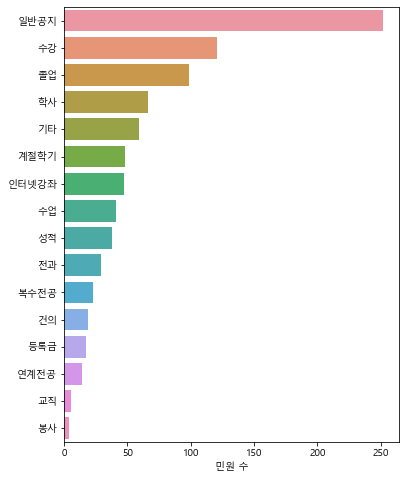

In [19]:
# 대부분 일반공지이며 그 외의 공지는 수강, 졸업, 학사에 관련한 공지임
plt.figure(figsize=(6,8))
sns.barplot(x='민원 수' ,data=type_df, y=type_df.index)

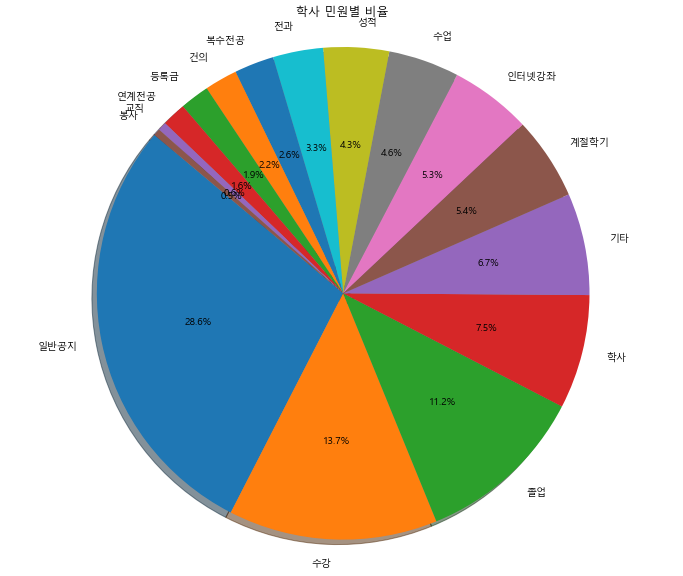

In [20]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.figure(figsize=(12,10))
plt.pie(type_df['비율'], labels=type_df.index,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('학사 민원별 비율')
plt.show()

# 학사민원 데이터 시계열 분석

In [23]:
df = pd.read_csv("../data/학사민원.csv")
del df['Unnamed: 0']
df

,date,title,type
0,2020.09.08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내,일반공지
1,2018.05.03,일반공지 불법 방문판매 행위 예방 안내,일반공지
2,2017.09.28,일반공지 생명을 살리는 자동제세동기 위치 안내,일반공지
3,2017.06.29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요,일반공지
4,2020.11.26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타
...,...,...,...
877,2020.03.16,졸업 인문 졸업학점 문의드립니다,졸업
878,2020.03.16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강
879,2020.03.14,수강 자연 재수강신청하느법,수강
880,2020.03.13,전과 자연 온라인 수업 철학과 인간,전과


In [25]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,date,title,type,year,month,day
0,2020-09-08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내,일반공지,2020,9,8
1,2018-05-03,일반공지 불법 방문판매 행위 예방 안내,일반공지,2018,5,3
2,2017-09-28,일반공지 생명을 살리는 자동제세동기 위치 안내,일반공지,2017,9,28
3,2017-06-29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요,일반공지,2017,6,29
4,2020-11-26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타,2020,11,26
...,...,...,...,...,...,...
877,2020-03-16,졸업 인문 졸업학점 문의드립니다,졸업,2020,3,16
878,2020-03-16,수강 자연 신청한 과목 교수님 이아닌 다른교수님 강좌가 업로드되어있습니다,수강,2020,3,16
879,2020-03-14,수강 자연 재수강신청하느법,수강,2020,3,14
880,2020-03-13,전과 자연 온라인 수업 철학과 인간,전과,2020,3,13


In [26]:
# 월별 민원 수를 count 하기 위한 컬럼 생성

df['count'] = 1

In [27]:
group_month_df = df.groupby('month').sum()

In [28]:
group_month_df

,year,day,count
month,,,
3,210080,1902,104
4,78780,656,39
5,197834,809,98
6,343211,3664,170
7,191900,1554,95
8,262600,1826,130
9,339171,2813,168
10,54540,425,27
11,103020,894,51


# 월별 학사 민원 수 변화 시각화

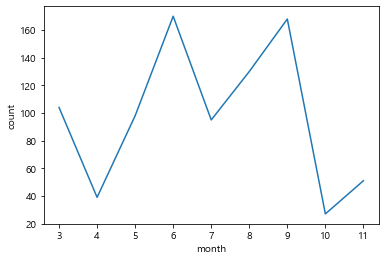

In [30]:
sns.lineplot(data=group_month_df, y='count',x=group_month_df.index)

# 민원이 3월을 시작으로 6월, 9월에 많은것으로 나타남

# 코로나 이후 명지대학교 SNS 게시물 수와 민원 수 비교 시각화

In [33]:


after = pd.read_csv("../data/코로나_이후_명지.csv")
del after['Unnamed: 0']
after.columns=['recommend','comment','date','title','content']
after = after.drop([0,1])
for i in range(len(after)):
    after['date'].iloc[i] = "2020/"+after['date'].iloc[i]
after = after.drop([1955,1956])
after['date'] = pd.to_datetime(after['date'], format = '%Y-%m-%d %H:%M')
after['year'] = after['date'].dt.year
after['month'] = after['date'].dt.month
after['day'] = after['date'].dt.day
after['time'] = after['date'].dt.time
after['hour'] = after['date'].dt.hour
after['minute'] = after['date'].dt.minute

In [34]:
after['count']=1
after = after.groupby('month').sum()

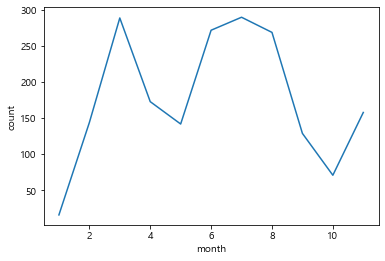

In [36]:
sns.lineplot(data=after, x=after.index, y='count')

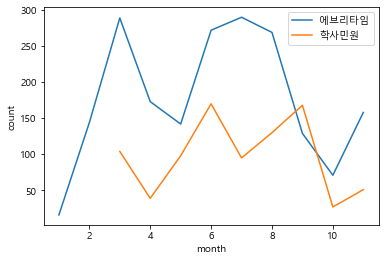

In [37]:
sns.lineplot(data=after, x=after.index, y='count', label='에브리타임')
sns.lineplot(data=group_month_df, y='count',x=group_month_df.index, label='학사민원')

- 완벽히 일치하진 않으나 증감 추세가 비슷함을 보인다.
- 따라서 학사민원이 많은 시기는 코로나 관련 민원이 많을 것으로 예샹됨
- 7월의 경우는 방학 시기이기 때문에 학사 민원이 적었을 것으로 예상됨


# 워드 클라우드-민원이 많았던 시기를 중심으로

In [39]:
df.head()

,date,title,type,year,month,day,count
0,2020-09-08,일반공지 자연캠퍼스 학년도 학기 복지시설 이용안내,일반공지,2020,9,8,1
1,2018-05-03,일반공지 불법 방문판매 행위 예방 안내,일반공지,2018,5,3,1
2,2017-09-28,일반공지 생명을 살리는 자동제세동기 위치 안내,일반공지,2017,9,28,1
3,2017-06-29,일반공지 군학점관련은 학사 군휴학은 휴복학 학생증 증명서 게시판을 이용해주세요,일반공지,2017,6,29,1
4,2020-11-26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타,2020,11,26,1


In [40]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

- 중복되는 일반공지가 많기에 일반공지 삭제

In [41]:
df = df[df['type']!='일반공지']
df.head()

,date,title,type,year,month,day,count
4,2020-11-26,기타 인문대학 본배정 희망학과 신청서 제출 관련 새글,기타,2020,11,26,1
5,2020-11-26,복수전공 인문 복수전공 부전공 관련 문의 새글,복수전공,2020,11,26,1
6,2020-11-26,계절학기 자연 계절학기 수강에 관해서 문의드립니다 새글,계절학기,2020,11,26,1
7,2020-11-26,수업 인문 전공자유학부 학과 선택 새글,수업,2020,11,26,1
8,2020-11-26,수강 인문 복학 후 재수강 관련 새글,수강,2020,11,26,1


In [42]:
df1 = df[df['date'] < '2020-05-01']

In [43]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = df
train_data[:30] # 상위 5개 출력

train_data = train_data.dropna()

word_list = []

for i in train_data.title:
    word_list.append(i)
    
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)
            
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

from collections import Counter
from wordcloud import WordCloud

counts = Counter(noun_list)
tags = counts.most_common(100)



In [44]:
tags = dict(tags)
tags.pop('인문')
tags.pop('자연')
tags.pop('관련')
tags.pop('학기')

146

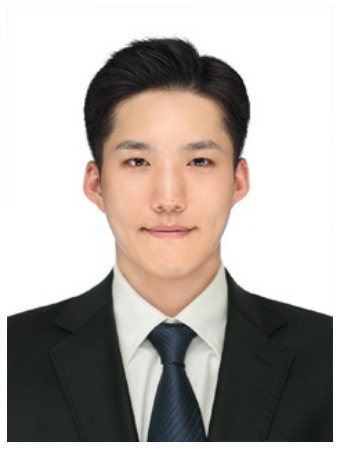

{'졸업': 180, '문의': 162, '수강': 151, '계절': 113, '전공': 89, '학사': 75, '강의': 73, '질문': 69, '학점': 66, '수업': 64, '기타': 60, '전과': 58, '인터넷': 55, '성적': 55, '강좌': 50, '복수': 47, '재수강': 43, '등록금': 41, '신청': 39, '온라인': 34, '과목': 33, '토익': 24, '건의': 24, '기간': 19, '수강신청': 16, '교양': 15, '취업': 14, '출석': 14, '대해': 13, '평가': 13, '영어': 12, '시험': 12, '제출': 11, '유예': 11, '학생': 11, '인정': 11, '인증': 11, '철회': 11, '이수': 11, '초과': 10, '동계': 9, '조기졸업': 9, '학년': 9, '확인': 9, '문제': 9, '서버': 9, '선택': 8, '모의': 8, '봉사': 8, '회화': 8, '조기': 8, '유고': 8, '결석': 8, '변경': 8, '실습': 7, '입력': 7, '교직': 7, '학교': 7, '과제': 7, '납부': 7, '언제': 7, '폐강': 7, '화상': 7, '대면': 7, '마련': 7, '대학': 6, '관해': 6, '수료': 6, '일정': 6, '공지': 6, '방법': 6, '업로드': 6, '실시간': 6, '추가': 6, '환불': 6, '교수': 6, '개선': 6, '요구': 6, '대책': 6, '자유': 5, '학부': 5, '교차': 5, '현장': 5, '이번': 5, '이메일': 5, '공학': 5, '이월': 5, '계획': 5, '일부': 5, '학위': 5, '대하': 5, '오류': 5, '다른': 5, '로그인': 5, '신청서': 4, '복학': 4}


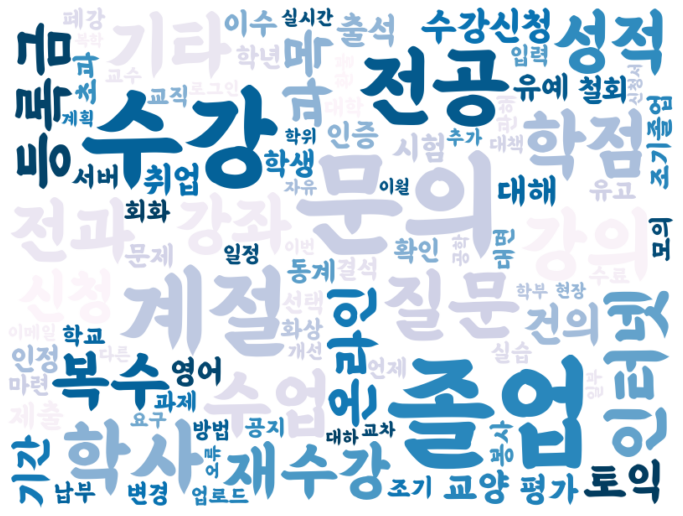

In [45]:
from PIL import Image # 워드클라우드용 마스크를 생성하기위한 라이브러리 import
custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

from collections import Counter
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=150, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

- 1, 2분기 이후 학사민원에서도 여전히 인터넷 강의에 개선에 대한 민원이 많았고 등록금과 졸업에 관한 민원도 상당 수 차지한것을 확인

In [47]:
df2 = df[df['date'] < '2020-05-01']

In [48]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = df2
train_data[:30] # 상위 5개 출력

train_data = train_data.dropna()

word_list = []

for i in train_data.title:
    word_list.append(i)
    
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)
            
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

from collections import Counter
from wordcloud import WordCloud

counts = Counter(noun_list)
tags = counts.most_common(100)



In [49]:
tags = dict(tags)
tags.pop('인문')
tags.pop('문의')
tags.pop('관련')
tags.pop('자연')

41

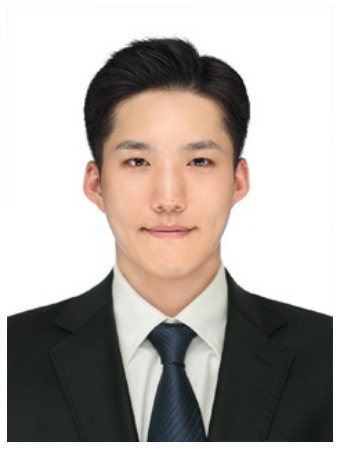

{'수강': 53, '강의': 38, '인터넷': 31, '수업': 28, '강좌': 26, '온라인': 24, '등록금': 19, '졸업': 17, '학기': 11, '건의': 11, '기타': 10, '과목': 10, '재수강': 9, '학사': 9, '학점': 9, '전공': 9, '서버': 8, '제출': 7, '신청': 7, '문제': 7, '마련': 7, '수강신청': 6, '개선': 6, '요구': 6, '대책': 6, '성적': 5, '기간': 5, '전과': 5, '교수': 5, '업로드': 5, '철회': 4, '영어': 4, '계절': 4, '로그인': 4, '과제': 4, '학생': 4, '폐강': 4, '부제': 4, '질문': 3, '중간고사': 3, '유고': 3, '결석': 3, '교차': 3, '학년': 3, '방식': 3, '초과': 3, '인증': 3, '회화': 3, '일부': 3, '환불': 3, '변경': 3, '학교': 3, '해결': 3, '인하': 3, '이월': 2, '조기': 2, '취업': 2, '평가': 2, '실시간': 2, '인정': 2, '토익': 2, '대해': 2, '화상': 2, '가이드라인': 2, '자율': 2, '출석': 2, '오류': 2, '사항': 2, '원서': 2, '공학': 2, '교직': 2, '복수': 2, '신청서': 2, '다른': 2, '여부': 2, '사이버': 2, '방법': 2, '감당': 2, '제발': 2, '얼른': 2, '관리': 2, '오프라인': 1, '시험': 1, '경영': 1, '기한': 1, '연구실': 1, '정기': 1, '안전교육': 1, '참여': 1, '안내': 1, '계열': 1, '원격강좌': 1, '취득': 1, '요건': 1, '뭔가': 1, '앙트레': 1}


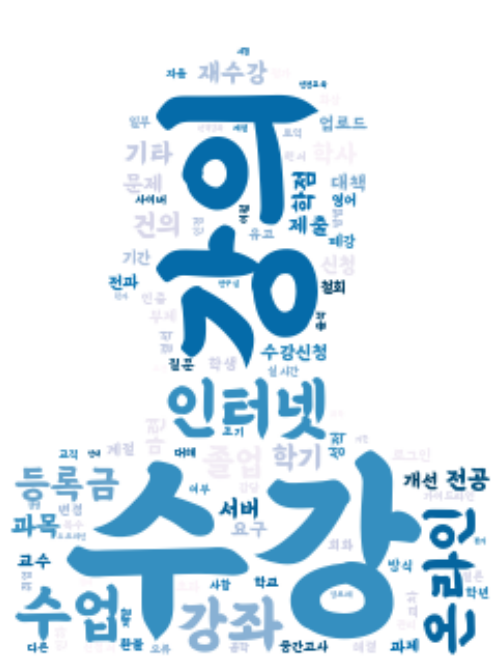

In [50]:
from PIL import Image # 워드클라우드용 마스크를 생성하기위한 라이브러리 import
custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

from collections import Counter
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=100, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

- 2020년 1, 2분기에 주 학사민원을 살펴본 결과 온라인 강의에 대한 여러 문제점과 등록금에 관한 민원이 상당수를 차지한 것을 확인

# 분석결과

학사 민원의 카테고리를 살펴본 결과 일반공지를 제외한 것 중 수강, 졸업, 학사에 관련한 문의가 가장 많았다.

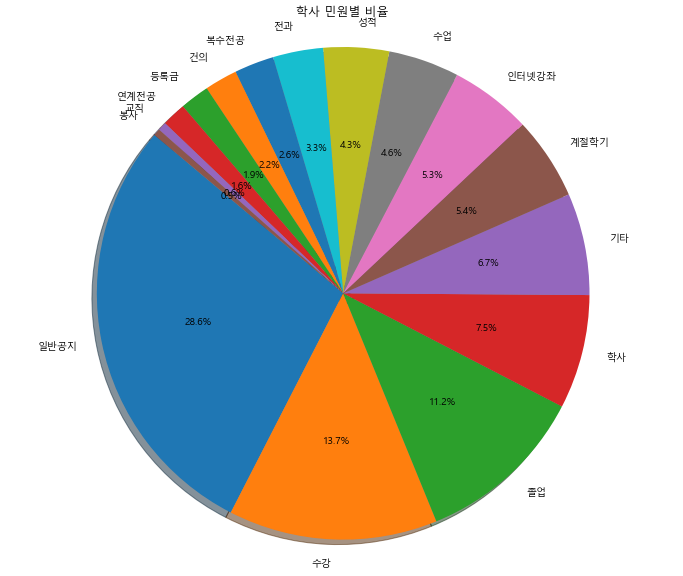

- 약 800건의 학사민원을 스크랩하여 분석한 결과 월별 민원수의 증감 변화가 에브리타임의 게시물 증감의 추세와 비슷한 양상을 띄고있었다.
- 이는 학사 민원 역시 코로나에 관련한 민원이 많았을 것으로 예상됨

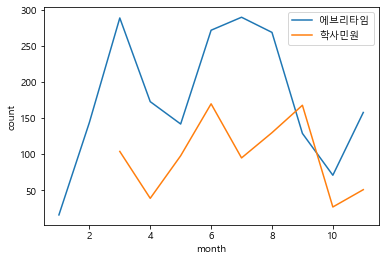

2020년 1,2 분기의 학사 민원을 중심으로 워드클라우드 생성
주로 인터넷 강의 초기의 문제점에 대한 민원이 많았고 그 의외에 등록금과 관련한 민원이 많았음을 확인

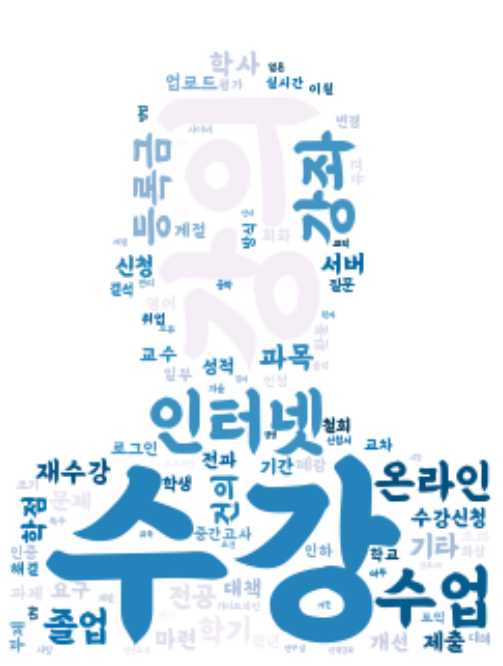

- 3,4분기의 민원을 중심으로 워드클라우드를 생성
- 1,2 분기와 마찬가지로 인터넷 강의와 등록금에 관한 민원이 많았다.
- 추가적으로 졸업에 관련한 문의가 많아진 것을 확인(2학기이기 때문일 수도 있다고 생각)

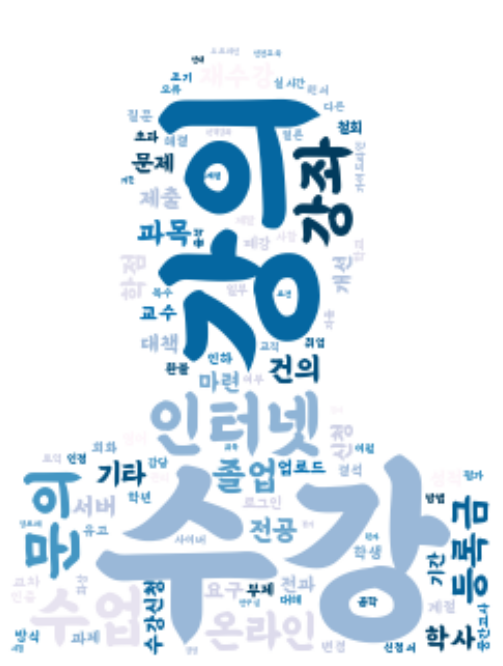